In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt

In [3]:
df_subscribers = pd.read_pickle("subscribers")

In [4]:
df_reps=pd.read_pickle("customer_service_reps")
# df_reps.to_csv("customer_service_reps.csv")
df_reps.head(5)
# df_reps.groupby("renew").count()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


# AB Test Group 1(14 vs 7)

In [5]:
df_reps['num_trial_days'] = df_reps['num_trial_days'].replace(0, np.nan)

In [6]:
df_reps=df_reps.dropna(subset=["num_trial_days","renew"])

In [7]:
df_reps.groupby("num_trial_days").count()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
num_trial_days,,,,,,,,,,,,
14.0,606100,606100,606100,276517,606100,606100,606100,606100,606100,606100,218510,606100


In [8]:
# Reorganize data
df_reps_summary=df_reps[["subid","renew","num_trial_days"]]#.groupby(["num_trial_days"])#.agg({'subid': 'count', 'renew': 'sum'})
df_reps_summary.to_csv("reps.csv")

In [9]:
df_reps_summary.head()

,subid,renew,num_trial_days
60,28948735,False,14.0
61,21697364,False,14.0
62,27800927,True,14.0
63,27800927,False,14.0
67,20407871,False,14.0


# AB Test Group 2(High vs low monthly price)

In [10]:
df_subs=pd.read_csv("/Users/hllsm/Downloads/Copy of subscribers.csv")

In [11]:
df_subs["plan_type"].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
low_sar_no_trial                          1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [12]:
df_subs["monthly_price"].value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

In [13]:
high_subs=df_subs[df_subs['plan_type'].str.contains('high')]
low_subs=df_subs[df_subs['plan_type'].str.contains('low')]

In [17]:
high_subs

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
259,43460,24333505,enhanced,3.0,comedy,supplement OTT,30.201361,2.0,59.0,False,...,0.0367,ar,Standard Charter,14,True,2,2020/3/19 0:05,2020/7/19 0:05,NaN,True
1846,485756,27034473,base,NaN,other,access to exclusive content,24.401536,NaN,38.0,False,...,0.0367,ar,NaN,14,True,2,2020/3/19 5:55,2020/7/19 5:55,NaN,True
2258,595152,25845644,base,2.0,comedy,replace OTT,25.851492,2.0,28.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
2309,450228,22387589,base,3.0,comedy,access to exclusive content,18.601711,2.0,39.0,False,...,0.0367,ar,NaN,14,True,2,2020/3/18 18:28,2020/7/18 18:28,NaN,True
2379,488454,24132460,base,2.0,comedy,replace OTT,28.751405,2.0,25.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,2019/11/13 0:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222721,568082,27965781,enhanced,NaN,comedy,access to exclusive content,30.201361,NaN,32.0,False,...,0.0367,ar,NaN,14,True,2,2020/3/18 23:08,2020/7/18 23:08,NaN,True
224678,239447,23238995,base,3.0,comedy,other,30.201361,2.0,42.0,False,...,0.0367,ar,Paypal,14,True,2,2020/3/19 23:27,2020/7/19 23:27,NaN,True
224724,416515,28319690,enhanced,NaN,comedy,access to exclusive content,27.301448,NaN,58.0,False,...,0.0367,ar,NaN,14,True,2,2020/3/18 19:29,2020/7/18 19:29,NaN,True
225710,551418,20764619,enhanced,NaN,drama,other,27.301448,NaN,49.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True


In [18]:
low_subs

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
322,511887,22031615,NaN,4.0,NaN,NaN,NaN,NaN,25.0,False,...,0.0,ar,NaN,0,True,3,2020/3/24 23:20,2020/7/24 23:20,NaN,True
553,31201,28496166,NaN,2.0,NaN,NaN,NaN,NaN,40.0,False,...,0.0,ar,Paypal,0,False,1,2019/7/27 19:57,NaN,2019/10/9 0:00,True
5912,522051,21941388,NaN,NaN,NaN,NaN,NaN,NaN,26.0,False,...,0.0,ar,NaN,0,True,2,2019/11/28 5:46,2020/3/28 5:46,NaN,True
5958,12672,21827870,NaN,2.0,NaN,NaN,NaN,NaN,49.0,False,...,0.0,ar,Standard Charter,0,False,0,NaN,NaN,NaN,True
7164,124600,21327523,NaN,4.0,NaN,NaN,NaN,NaN,41.0,True,...,0.0,ar,Paypal,0,True,3,2020/3/26 13:28,2020/7/26 13:28,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218932,3810,23854068,NaN,NaN,NaN,NaN,NaN,NaN,26.0,False,...,0.0,ar,Paypal,0,True,3,2020/3/24 5:31,2020/7/24 5:31,NaN,True
219037,2777,27066598,NaN,3.0,NaN,NaN,NaN,NaN,58.0,False,...,0.0,ar,Najim,0,False,0,NaN,NaN,NaN,True
219516,28296,24533399,NaN,4.0,NaN,NaN,NaN,NaN,65.0,False,...,0.0,ar,RAKBANK,0,False,0,NaN,NaN,NaN,True
225582,21069,29824743,NaN,2.0,NaN,NaN,NaN,NaN,60.0,False,...,0.0,ar,Najim,0,False,0,NaN,NaN,2019/8/3 0:00,True


In [97]:
def calc_proportion(renew):
    return sum(renew)/len(renew)
def calc_zscore(phat, p, n_f):
    return (phat-p)/np.sqrt(p*(1-p)/n_f)
def get_z_crit_value(alpha_f, num_sides_f):
    return norm.ppf(1-(alpha_f/num_sides_f))
def get_p_value(zscore_f, num_sides_f):
    return (1-norm.cdf(abs(zscore_f))) * num_sides_f
def reject_null(variantA_outcomes_f, variantB_outcomes_f, alpha_f, num_sides_f):
    p_hat_f = calc_proportion(variantB_outcomes_f)
    p_f = calc_proportion(variantA_outcomes_f)
    n_f = len(variantB_outcomes_f)
    z_score = calc_zscore(p_hat_f, p_f, n_f)
    p_value = get_p_value(z_score, num_sides_f)
    z_crit = get_z_crit_value(alpha_f, num_sides_f)
    return z_score > z_crit, z_score, p_value

In [98]:
high_outcomes = high_subs['current_sub_TF'] 
low_outcomes = low_subs['current_sub_TF']

# --- conduct tests
reject_null_test, z_score, p_value = reject_null(high_outcomes, low_outcomes, 0.05, 1)
print('Conversion rate for Variant A: %3.1f%%' % (calc_proportion(high_outcomes)*100))
print('Conversion rate for Variant B: %3.1f%%' % (calc_proportion(low_outcomes)*100))
print('Using all Variant B, reject null T/F?: %s' % reject_null_test)
print('z-score = %3.2f and p-value = %3.1f%%' % (z_score, p_value*100))

Conversion rate for Variant A: 53.8%
Conversion rate for Variant B: 27.2%
Using all Variant B, reject null T/F?: False
z-score = -7.03 and p-value = 0.0%


# Segmentation

In [214]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [215]:
print(df_subs.head())
print(df_subs.describe())
print(df_subs.dtypes)

print(df.isnull().sum())

   Unnamed: 0     subid package_type  num_weekly_services_utilized  \
0      162502  21724479      economy                           NaN   
1      380374  23383224         base                           NaN   
2      496617  26844789     enhanced                           3.0   
3      356799  29417030         base                           NaN   
4      681701  26723159         base                           4.0   

  preferred_genre                 intended_use  weekly_consumption_hour  \
0          comedy  access to exclusive content                      NaN   
1          comedy  access to exclusive content                22.951579   
2        regional                  replace OTT                36.001186   
3           drama                  replace OTT                20.051667   
4          comedy                  replace OTT                22.951579   

   num_ideal_streaming_services   age male_TF  ... join_fee language  \
0                           NaN   NaN   False  ...      

In [216]:
df_seg=df_subs[["age","preferred_genre","intended_use","weekly_consumption_hour","package_type"]]
df_seg=df_seg.dropna()
df_seg=df_seg[df_seg['age']<120]
df_seg

,age,preferred_genre,intended_use,weekly_consumption_hour,package_type
1,70.0,comedy,access to exclusive content,22.951579,base
2,25.0,regional,replace OTT,36.001186,enhanced
3,30.0,drama,replace OTT,20.051667,base
4,28.0,comedy,replace OTT,22.951579,base
5,70.0,comedy,access to exclusive content,20.051667,base
...,...,...,...,...,...
227622,43.0,drama,access to exclusive content,24.401536,base
227623,38.0,comedy,supplement OTT,28.751405,enhanced
227624,49.0,comedy,replace OTT,27.301448,enhanced
227625,45.0,comedy,access to exclusive content,31.651317,base


In [217]:
df_seg.head()

,age,preferred_genre,intended_use,weekly_consumption_hour,package_type
1,70.0,comedy,access to exclusive content,22.951579,base
2,25.0,regional,replace OTT,36.001186,enhanced
3,30.0,drama,replace OTT,20.051667,base
4,28.0,comedy,replace OTT,22.951579,base
5,70.0,comedy,access to exclusive content,20.051667,base


In [218]:
one_hot = OneHotEncoder(sparse=False)

In [219]:
cat_feat = list(df_seg.columns[df_seg.dtypes == object])
num_feat = list(df_seg.columns[df_seg.dtypes != object])
df_seg_cat = df_seg.loc[:,cat_feat] 
df_seg_num = df_seg.loc[:,num_feat]
df_seg_cat = pd.DataFrame(one_hot.fit_transform(df_seg_cat))
print(df_seg_cat)

df_seg_new = pd.concat([df_seg_cat,df_seg_num],axis=1)
sc_dfa = StandardScaler()
df_seg_new = sc_dfa.fit_transform(df_seg_new.astype(float))

df_seg_new = df_seg_new[np.isfinite(df_seg_new).all(1)]

         0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0       1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
3       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
4       1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
154254  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
154255  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
154256  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
154257  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
154258  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

         14  
0       0.0  
1       1.0

/Users/hllsm/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/hllsm/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


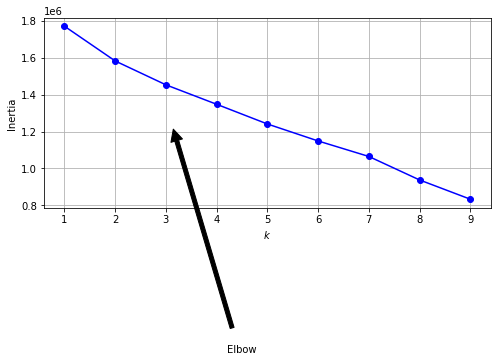

In [220]:
# Elbow test
import matplotlib.pyplot as plt
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_seg_new)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(3, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")

plt.grid()
# save_fig("inertia_vs_k_plot")
plt.show()

In [221]:
df_seg[[ 'age','weekly_consumption_hour']] = sc_dfa.fit_transform(df_seg[['age','weekly_consumption_hour']])

In [222]:
categorical_features_idx = [1,2,4]

In [223]:
# !pip install kmodes

In [224]:
from kmodes.kprototypes import KPrototypes

In [225]:
categorical_features_idx

[1, 2, 4]

In [226]:
df_array

array([[-0.0035828333423355155, 'comedy', 'access to exclusive content',
        -1.0140298582364784, 'base'],
       [-0.00381718399927005, 'regional', 'replace OTT',
        1.608306937330968, 'enhanced'],
       [-0.0037911450373884353, 'drama', 'replace OTT',
        -1.59677136746946, 'base'],
       ...,
       [-0.003692196982238298, 'comedy', 'replace OTT',
        -0.13991759237749116, 'enhanced'],
       [-0.00371302815174359, 'comedy', 'access to exclusive content',
        0.7341946714719813, 'base'],
       [-0.0036609502279803603, 'comedy', 'replace OTT',
        -0.43128834699398194, 'base']], dtype=object)

In [227]:
df_array=df_seg.values
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=3)
kproto.fit(df_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 25009, ncost: 235607.08433889254
Run: 1, iteration: 2/3, moves: 10838, ncost: 234038.8117767365
Run: 1, iteration: 3/3, moves: 4121, ncost: 233760.1988851952
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/3, moves: 20610, ncost: 239544.12834864913
Run: 2, iteration: 2/3, moves: 10824, ncost: 237140.95714842883
Run: 2, iteration: 3/3, moves: 6743, ncost: 236143.35245014634
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/3, moves: 26363, ncost: 254395.1267974892
Run: 3, iteration: 2/3, moves: 12432, ncost: 250464.69707604224
Run: 3, iteration: 3/3, moves: 13941, ncost: 242902.57920371587
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/3, moves: 59

KPrototypes(gamma=0.5, max_iter=3, n_clusters=3, verbose=2)

In [228]:
df_array

array([[1.700454445897128, 'comedy', 'access to exclusive content',
        -1.0189842885753586, 'base'],
       [-1.4927160644607602, 'regional', 'replace OTT',
        1.5855617556996744, 'enhanced'],
       [-1.1379193410876614, 'drama', 'replace OTT', -1.5977722975271964,
        'base'],
       ...,
       [0.21030820773011352, 'comedy', 'replace OTT',
        -0.15080227315172012, 'enhanced'],
       [-0.07352917096836542, 'comedy', 'access to exclusive content',
        0.7173797402760366, 'base'],
       [0.636064275777832, 'comedy', 'replace OTT', -0.440196277627639,
        'base']], dtype=object)

In [230]:
clusters = kproto.predict(df_array, categorical=categorical_features_idx)

In [231]:
df_seg['cluster'] = list(clusters)
df_seg[[ 'age','weekly_consumption_hour']] = sc_dfa.inverse_transform(df_seg[['age','weekly_consumption_hour']])
df_seg

,age,preferred_genre,intended_use,weekly_consumption_hour,package_type,cluster
1,70.0,comedy,access to exclusive content,22.951579,base,1
2,25.0,regional,replace OTT,36.001186,enhanced,2
3,30.0,drama,replace OTT,20.051667,base,0
4,28.0,comedy,replace OTT,22.951579,base,0
5,70.0,comedy,access to exclusive content,20.051667,base,1
...,...,...,...,...,...,...
227622,43.0,drama,access to exclusive content,24.401536,base,0
227623,38.0,comedy,supplement OTT,28.751405,enhanced,0
227624,49.0,comedy,replace OTT,27.301448,enhanced,1
227625,45.0,comedy,access to exclusive content,31.651317,base,2


In [232]:
df_seg

,age,preferred_genre,intended_use,weekly_consumption_hour,package_type,cluster
1,70.0,comedy,access to exclusive content,22.951579,base,1
2,25.0,regional,replace OTT,36.001186,enhanced,2
3,30.0,drama,replace OTT,20.051667,base,0
4,28.0,comedy,replace OTT,22.951579,base,0
5,70.0,comedy,access to exclusive content,20.051667,base,1
...,...,...,...,...,...,...
227622,43.0,drama,access to exclusive content,24.401536,base,0
227623,38.0,comedy,supplement OTT,28.751405,enhanced,0
227624,49.0,comedy,replace OTT,27.301448,enhanced,1
227625,45.0,comedy,access to exclusive content,31.651317,base,2


In [233]:
df_seg['cluster'].value_counts()

1    58572
0    57795
2    37892
Name: cluster, dtype: int64

In [234]:
C1=df_seg[df_seg['cluster']==0]
C2=df_seg[df_seg['cluster']==1]
C3=df_seg[df_seg['cluster']==2]

# Others

In [14]:
df_subscriber_reps=df_subscribers.merge(df_reps,on="subid")
# df_subscriber_reps.to_csv("subscriber_reps.csv")

In [5]:
df.head(10)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,...,71.0,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,...,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN
681969,23452753,economy,2.850348,drama,replace OTT,28.751405,1.888272,False,71.0,False,...,4.0,False,2020-02-05,False,0.0000,0.3303,ar,False,False,NaN


In [6]:
df.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,151768.000000,192724.000000,192724.000000
mean,2.498624e+07,2.998568,27.997724,1.999848,7.579755e+02,4.0,4.732049,4.512188,16.570832,1.557353,0.115145
std,2.885543e+06,0.748752,4.976341,0.249508,1.920204e+05,0.0,0.101049,0.097078,35.777986,3.068829,0.176971
min,2.000001e+07,0.049049,-32.146760,-0.919933,0.000000e+00,4.0,0.807400,0.770700,-108.000000,-5.982100,-0.660600
25%,2.248998e+07,2.493926,24.401536,1.867354,3.500000e+01,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
50%,2.497011e+07,2.760506,27.301448,1.908159,4.600000e+01,4.0,4.734300,4.514100,8.000000,0.000000,0.036700
75%,2.749020e+07,3.271574,30.201361,1.953559,5.700000e+01,4.0,4.734300,4.514100,13.000000,2.532300,0.110100
max,2.999998e+07,14.335378,76.599962,6.955714,8.172000e+07,4.0,5.101300,5.027900,312.000000,15.634200,0.734000
